<h1 style="font-weight:normal" align="center">
  &nbsp;Yet Another Spotify Song Recommender 🎵&nbsp;<br>
  <a href="https://github.com/alcazar90/CC5205-3-proyecto"><img src="https://play-lh.googleusercontent.com/PCpXdqvUWfCW1mXhH1Y_98yBpgsWxuTSTofy3NGMo9yBTATDyzVkqU580bfSln50bFU" alt="Spotify" border="0" width="25" height="25"></a>
</h1>

Integrantes: 

* Cristóbal Alcázar
* Felipe Callpa
* Diego Cortez
* Gianina Salomó
* Christopher Stears

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nueva
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
playlists = pd.read_csv('https://github.com/alcazar90/CC5205-3-proyecto/raw/main/data/2000_spotify_sample.csv.gz')

/tmp/ipykernel_44450/1671611853.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  playlists = pd.read_csv('https://github.com/alcazar90/CC5205-3-proyecto/raw/main/data/2000_spotify_sample.csv.gz')


In [22]:
track_info = pd.read_csv('https://github.com/alcazar90/CC5205-3-proyecto/raw/main/data/tracks_features/2000_tracks_sample.csv.gz')
#tracks = pd.concat([pd.DataFrame(row, index=[0]) for row in track_info])
track_info

,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.type,audio_features.id,audio_features.uri,audio_features.track_href,audio_features.analysis_url,audio_features.duration_ms,audio_features.time_signature
0,0.628,0.8700,5,-5.752,0,0.1080,0.01970,0.000000,0.1180,0.8500,170.686,audio_features,5QxbGa4K41SPmY8zeyRs67,spotify:track:5QxbGa4K41SPmY8zeyRs67,https://api.spotify.com/v1/tracks/5QxbGa4K41SP...,https://api.spotify.com/v1/audio-analysis/5Qxb...,227747,4
1,0.303,0.4010,2,-13.932,1,0.0375,0.02280,0.768000,0.1130,0.0974,155.822,audio_features,4y0Lt1KOuyhKGkGKFZjSlS,spotify:track:4y0Lt1KOuyhKGkGKFZjSlS,https://api.spotify.com/v1/tracks/4y0Lt1KOuyhK...,https://api.spotify.com/v1/audio-analysis/4y0L...,205333,4
2,0.830,0.5080,5,-6.070,1,0.0613,0.02910,0.000000,0.2400,0.7970,95.051,audio_features,265yhmmWClZfBmgNPzwOMP,spotify:track:265yhmmWClZfBmgNPzwOMP,https://api.spotify.com/v1/tracks/265yhmmWClZf...,https://api.spotify.com/v1/audio-analysis/265y...,195740,4
3,0.907,0.4650,5,-7.123,0,0.2880,0.01750,0.000015,0.1170,0.1880,141.957,audio_features,4ibj6HRTdzkfvlDgxSXxCp,spotify:track:4ibj6HRTdzkfvlDgxSXxCp,https://api.spotify.com/v1/tracks/4ibj6HRTdzkf...,https://api.spotify.com/v1/audio-analysis/4ibj...,211692,4
4,0.296,0.8520,4,-5.095,1,0.0439,0.00113,0.678000,0.1410,0.5840,160.119,audio_features,6ZJyUCbGB4FFIuI8jiuafp,spotify:track:6ZJyUCbGB4FFIuI8jiuafp,https://api.spotify.com/v1/tracks/6ZJyUCbGB4FF...,https://api.spotify.com/v1/audio-analysis/6ZJy...,307050,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57621,0.604,0.2540,0,-12.659,1,0.0263,0.80000,0.045300,0.1200,0.2750,93.869,audio_features,1P4nMPtBDRWoCtycNXe43e,spotify:track:1P4nMPtBDRWoCtycNXe43e,https://api.spotify.com/v1/tracks/1P4nMPtBDRWo...,https://api.spotify.com/v1/audio-analysis/1P4n...,191893,3
57622,0.168,0.0279,0,-27.720,1,0.0472,0.97100,0.983000,0.0636,0.0339,63.076,audio_features,7aQVdAAfLbrut46qytrex3,spotify:track:7aQVdAAfLbrut46qytrex3,https://api.spotify.com/v1/tracks/7aQVdAAfLbru...,https://api.spotify.com/v1/audio-analysis/7aQV...,135413,4
57623,0.430,0.4250,2,-8.526,1,0.0307,0.74800,0.000502,0.1590,0.4160,145.230,audio_features,7BDQBKhg7XNX6WcHPZ1a0J,spotify:track:7BDQBKhg7XNX6WcHPZ1a0J,https://api.spotify.com/v1/tracks/7BDQBKhg7XNX...,https://api.spotify.com/v1/audio-analysis/7BDQ...,246173,4
57624,0.150,0.0554,4,-21.015,1,0.0417,0.86700,0.942000,0.1080,0.0325,138.057,audio_features,0WQ6xcKJJf8Jg9DxroD73U,spotify:track:0WQ6xcKJJf8Jg9DxroD73U,https://api.spotify.com/v1/tracks/0WQ6xcKJJf8J...,https://api.spotify.com/v1/audio-analysis/0WQ6...,228733,4


In [25]:
track_info.columns = [x.replace('audio_features.', '') for x in track_info.columns]

In [26]:
# Se obtiene la tabla artista.
artist_info = pd.read_csv('https://github.com/alcazar90/CC5205-3-proyecto/raw/main/data/artist/2000_artist_sample.csv.gz')

In [27]:
playlists.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description,pos,artist_name,track_uri,artist_uri,track_name,album_uri,album_name
0,music,False,521,1506643200,127,108,1,45,219480,85,NaN,0.0,Charli XCX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,spotify:artist:25uiPmTg16RbhZWAqwLBy5,After The Afterparty (feat. Lil Yachty),spotify:album:4Txd0wc4WAgnoxXx0SLAlw,After The Afterparty (feat. Lil Yachty)
1,music,False,521,1506643200,127,108,1,45,247160,85,NaN,1.0,The Chainsmokers,spotify:track:6RUKPb4LETWmmr3iAEQktW,spotify:artist:69GGBxA162lTqCwzJG5jLp,Something Just Like This,spotify:album:4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open
2,music,False,521,1506643200,127,108,1,45,223846,85,NaN,2.0,MAX,spotify:track:1sYSP7gKa5kdKIfhANfori,spotify:artist:1bqxdqvUtPWZri43cKHac8,Lights Down Low,spotify:album:2qmysBdftCYXRjYHTVK3qo,Hell's Kitchen Angel
3,music,False,521,1506643200,127,108,1,45,220293,85,NaN,3.0,Post Malone,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,spotify:artist:246dkjvS1zLTtiykXe5h60,Congratulations,spotify:album:5s0rmjP8XOPhP6HhqOhuyC,Stoney
4,music,False,521,1506643200,127,108,1,45,201160,85,NaN,4.0,AJR,spotify:track:3E2Zh20GDCR9B1EYjfXWyv,spotify:artist:6s22t5Y3prQHyaHWUN1R1C,Weak,spotify:album:7LACXphpLTluKLFqHIZ1Qq,The Click


In [28]:
track_info.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.628,0.870,5,-5.752,0,0.1080,0.01970,0.000000,0.118,0.8500,170.686,audio_features,5QxbGa4K41SPmY8zeyRs67,spotify:track:5QxbGa4K41SPmY8zeyRs67,https://api.spotify.com/v1/tracks/5QxbGa4K41SP...,https://api.spotify.com/v1/audio-analysis/5Qxb...,227747,4
1,0.303,0.401,2,-13.932,1,0.0375,0.02280,0.768000,0.113,0.0974,155.822,audio_features,4y0Lt1KOuyhKGkGKFZjSlS,spotify:track:4y0Lt1KOuyhKGkGKFZjSlS,https://api.spotify.com/v1/tracks/4y0Lt1KOuyhK...,https://api.spotify.com/v1/audio-analysis/4y0L...,205333,4
2,0.830,0.508,5,-6.070,1,0.0613,0.02910,0.000000,0.240,0.7970,95.051,audio_features,265yhmmWClZfBmgNPzwOMP,spotify:track:265yhmmWClZfBmgNPzwOMP,https://api.spotify.com/v1/tracks/265yhmmWClZf...,https://api.spotify.com/v1/audio-analysis/265y...,195740,4
3,0.907,0.465,5,-7.123,0,0.2880,0.01750,0.000015,0.117,0.1880,141.957,audio_features,4ibj6HRTdzkfvlDgxSXxCp,spotify:track:4ibj6HRTdzkfvlDgxSXxCp,https://api.spotify.com/v1/tracks/4ibj6HRTdzkf...,https://api.spotify.com/v1/audio-analysis/4ibj...,211692,4
4,0.296,0.852,4,-5.095,1,0.0439,0.00113,0.678000,0.141,0.5840,160.119,audio_features,6ZJyUCbGB4FFIuI8jiuafp,spotify:track:6ZJyUCbGB4FFIuI8jiuafp,https://api.spotify.com/v1/tracks/6ZJyUCbGB4FF...,https://api.spotify.com/v1/audio-analysis/6ZJy...,307050,4


In [29]:
artist_info.head()

,index,artists.external_urls.spotify,artists.followers.href,artists.followers.total,artists.genres,artists.href,artists.id,artists.images,artists.name,artists.popularity,artists.type,artists.uri
0,0,https://open.spotify.com/artist/2k5tpM7WrvCytp...,NaN,9220,['boogaloo'],https://api.spotify.com/v1/artists/2k5tpM7WrvC...,2k5tpM7WrvCytpVWO8XTjU,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Boogaloo Assassins,32,artist,spotify:artist:2k5tpM7WrvCytpVWO8XTjU
1,0,https://open.spotify.com/artist/0ffXAvDlWnqwic...,NaN,25229,"['latin jazz', 'mambo', 'salsa', 'tropical']",https://api.spotify.com/v1/artists/0ffXAvDlWnq...,0ffXAvDlWnqwiciaBFek6V,"[{'height': 396, 'url': 'https://i.scdn.co/ima...",Africando,40,artist,spotify:artist:0ffXAvDlWnqwiciaBFek6V
2,0,https://open.spotify.com/artist/1qNctKAgK8LDV3...,NaN,64244,"['latin jazz', 'salsa', 'salsa international']",https://api.spotify.com/v1/artists/1qNctKAgK8L...,1qNctKAgK8LDV3agmP8ukS,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Charlie Palmieri,33,artist,spotify:artist:1qNctKAgK8LDV3agmP8ukS
3,0,https://open.spotify.com/artist/7wIvJyLDNfkgdK...,NaN,47722,"['afro-cuban percussion', 'latin jazz', 'salsa']",https://api.spotify.com/v1/artists/7wIvJyLDNfk...,7wIvJyLDNfkgdKFVxJl5tL,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Poncho Sanchez,45,artist,spotify:artist:7wIvJyLDNfkgdKFVxJl5tL
4,0,https://open.spotify.com/artist/7fvEDuYk5vkKKZ...,NaN,141966,"['dominican pop', 'latin', 'merengue', 'mereng...",https://api.spotify.com/v1/artists/7fvEDuYk5vk...,7fvEDuYk5vkKKZGpv6Knus,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Johnny Ventura,46,artist,spotify:artist:7fvEDuYk5vkKKZGpv6Knus


Inner join entre la tabla `playlists` y `tracks` para anexar los features de 
las canciones.

In [864]:
df = playlists.merge(track_info, left_on='track_uri', right_on='uri', how='inner')

In [868]:
df = df.loc[df.duration_ms_y < 900000, :]

In [958]:
df

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms_x,num_artists,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature
0,music,False,521,1506643200,127,108,1,45,219480,85,...,0.3650,0.645,93.008,audio_features,0y8Wf6ltWpGCpgqVa21QNX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,https://api.spotify.com/v1/tracks/0y8Wf6ltWpGC...,https://api.spotify.com/v1/audio-analysis/0y8W...,219480,4
1,finds,False,535521,1481328000,48,47,1,27,219480,42,...,0.3650,0.645,93.008,audio_features,0y8Wf6ltWpGCpgqVa21QNX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,https://api.spotify.com/v1/tracks/0y8Wf6ltWpGC...,https://api.spotify.com/v1/audio-analysis/0y8W...,219480,4
2,Running,False,820737,1506211200,61,52,1,40,219480,40,...,0.3650,0.645,93.008,audio_features,0y8Wf6ltWpGCpgqVa21QNX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,https://api.spotify.com/v1/tracks/0y8Wf6ltWpGC...,https://api.spotify.com/v1/audio-analysis/0y8W...,219480,4
3,snowboarding,False,874521,1483056000,93,51,1,2,219480,30,...,0.3650,0.645,93.008,audio_features,0y8Wf6ltWpGCpgqVa21QNX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,https://api.spotify.com/v1/tracks/0y8Wf6ltWpGC...,https://api.spotify.com/v1/audio-analysis/0y8W...,219480,4
4,music,False,521,1506643200,127,108,1,45,247160,85,...,0.1640,0.446,103.019,audio_features,6RUKPb4LETWmmr3iAEQktW,spotify:track:6RUKPb4LETWmmr3iAEQktW,https://api.spotify.com/v1/tracks/6RUKPb4LETWm...,https://api.spotify.com/v1/audio-analysis/6RUK...,247160,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131675,Spanish songs,False,999521,1508457600,121,92,1,51,178760,53,...,0.3360,0.971,112.433,audio_features,0zjW4c0nPCrsaQA3q9yjml,spotify:track:0zjW4c0nPCrsaQA3q9yjml,https://api.spotify.com/v1/tracks/0zjW4c0nPCrs...,https://api.spotify.com/v1/audio-analysis/0zjW...,178760,3
131676,Spanish songs,False,999521,1508457600,121,92,1,51,214726,53,...,0.0802,0.858,104.968,audio_features,6tNrSTWNn4oUkoupn1ITJd,spotify:track:6tNrSTWNn4oUkoupn1ITJd,https://api.spotify.com/v1/tracks/6tNrSTWNn4oU...,https://api.spotify.com/v1/audio-analysis/6tNr...,214727,4
131677,Spanish songs,False,999521,1508457600,121,92,1,51,213440,53,...,0.3520,0.914,99.960,audio_features,7KXL3yfanDowu6shK3Vl0d,spotify:track:7KXL3yfanDowu6shK3Vl0d,https://api.spotify.com/v1/tracks/7KXL3yfanDow...,https://api.spotify.com/v1/audio-analysis/7KXL...,213440,1
131678,Spanish songs,False,999521,1508457600,121,92,1,51,175026,53,...,0.2210,0.767,139.859,audio_features,6c5ghmeB5B3eUwO9Gr4Dgx,spotify:track:6c5ghmeB5B3eUwO9Gr4Dgx,https://api.spotify.com/v1/tracks/6c5ghmeB5B3e...,https://api.spotify.com/v1/audio-analysis/6c5g...,175027,4


In [869]:
df.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms_x,num_artists,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature
0,music,False,521,1506643200,127,108,1,45,219480,85,...,0.365,0.645,93.008,audio_features,0y8Wf6ltWpGCpgqVa21QNX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,https://api.spotify.com/v1/tracks/0y8Wf6ltWpGC...,https://api.spotify.com/v1/audio-analysis/0y8W...,219480,4
1,finds,False,535521,1481328000,48,47,1,27,219480,42,...,0.365,0.645,93.008,audio_features,0y8Wf6ltWpGCpgqVa21QNX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,https://api.spotify.com/v1/tracks/0y8Wf6ltWpGC...,https://api.spotify.com/v1/audio-analysis/0y8W...,219480,4
2,Running,False,820737,1506211200,61,52,1,40,219480,40,...,0.365,0.645,93.008,audio_features,0y8Wf6ltWpGCpgqVa21QNX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,https://api.spotify.com/v1/tracks/0y8Wf6ltWpGC...,https://api.spotify.com/v1/audio-analysis/0y8W...,219480,4
3,snowboarding,False,874521,1483056000,93,51,1,2,219480,30,...,0.365,0.645,93.008,audio_features,0y8Wf6ltWpGCpgqVa21QNX,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,https://api.spotify.com/v1/tracks/0y8Wf6ltWpGC...,https://api.spotify.com/v1/audio-analysis/0y8W...,219480,4
4,music,False,521,1506643200,127,108,1,45,247160,85,...,0.164,0.446,103.019,audio_features,6RUKPb4LETWmmr3iAEQktW,spotify:track:6RUKPb4LETWmmr3iAEQktW,https://api.spotify.com/v1/tracks/6RUKPb4LETWm...,https://api.spotify.com/v1/audio-analysis/6RUK...,247160,4


Número único de listas:

In [870]:
len(df.pid.unique())

2000

Investigar luego esas listas que se perdieron, se supone que inicialmente eran 2000:

In [871]:
len(playlists.pid.unique())

2000

**Distribución del número de canciones por lista**

/home/alkzar/.pyenv/versions/3.8.5/envs/eda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='track_uri', ylabel='Density'>

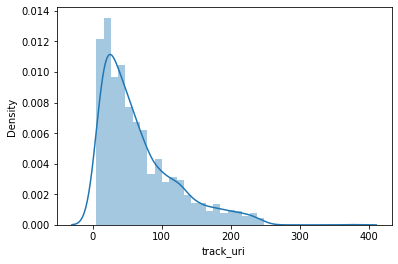

In [872]:
sns.distplot(playlists.groupby('pid')['track_uri'].count())

**Distribución de duración (en mín) por lista**

/home/alkzar/.pyenv/versions/3.8.5/envs/eda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

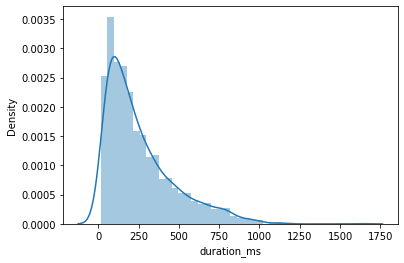

In [873]:
sns.distplot(playlists.groupby('pid')['duration_ms'].sum()/60000)

**Distribución número de seguidos por lista**

<AxesSubplot:xlabel='num_followers', ylabel='Count'>

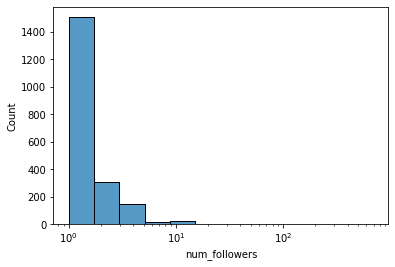

In [874]:
sns.histplot(playlists.groupby('pid')['num_followers'].max(), log_scale=True)

Hay una lista con muchos seguidores:


In [875]:
playlists.loc[playlists.num_followers == playlists.num_followers.max(), :].head(n=3)

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description,pos,artist_name,track_uri,artist_uri,track_name,album_uri,album_name
130824,Best Songs of 2016,False,993737,1484870400,197,116,692,20,382386,114,NaN,0.0,David Bowie,spotify:track:3Vn9oCZbdI1EMO7jxdz2Rc,spotify:artist:0oSGxfWSnnOXhD2fKuz2Gy,Lazarus,spotify:album:2w1YJXWMIco6EBf0CovvVN,Blackstar
130825,Best Songs of 2016,False,993737,1484870400,197,116,692,20,291946,114,NaN,1.0,David Bowie,spotify:track:6N9PAf91qP6aJIzT8bVoof,spotify:artist:0oSGxfWSnnOXhD2fKuz2Gy,Girl Loves Me,spotify:album:2w1YJXWMIco6EBf0CovvVN,Blackstar
130826,Best Songs of 2016,False,993737,1484870400,197,116,692,20,434666,114,NaN,2.0,Eric Prydz,spotify:track:5rQ8WVEKsGEY0voH5s4lzw,spotify:artist:5sm0jQ1mq0dusiLtDJ2b4R,Every Day,spotify:album:3w8nFeEqwsgAoUxodM0NTr,Opus


## Heatmap de caracterizacion de playlist por la composición de un atributo 

**TODO:** filtrar todas las listas con N canciones y crear mapa de calor por track feature.

**OJO:** es interesante ver el orden del track en la posición de la lista,
se encuentra alguna relación en la posición que están las canciones en la lista?


Buscar `pid` con igual número de canciones:

In [876]:
heatmap = df.loc[df.num_tracks == 20, ['pid', 'num_tracks', 'track_name', 'loudness']].sort_values('pid')
heatmap.head(n=3)

,pid,num_tracks,track_name,loudness
39636,30521,20,Love Yourself,-9.828
97329,30521,20,Levon,-10.499
97328,30521,20,Something to Believe In - 2003 - Remaster,-5.009


Ordenar los tracks de cada lista por su atributo de menor a mayor:

In [877]:
heatmap.sort_values(['pid', 'loudness'], inplace=True)

In [878]:
heatmap['track_pos'] = heatmap.groupby('pid').cumcount()

In [879]:
heatmap.head(n=3)

,pid,num_tracks,track_name,loudness,track_pos
55141,30521,20,Walk On the Wild Side,-16.729,0
95925,30521,20,Going To California,-15.913,1
42216,30521,20,Fast Car,-15.523,2


In [880]:
heatmap.tail(n=3)

,pid,num_tracks,track_name,loudness,track_pos
97249,945521,20,Call Me a Spaceman - Extended Mix,-3.671,17
39084,945521,20,"When They Fight, They Fight",-1.866,18
56328,945521,20,Coming Home,-1.844,19


Crear variable categorica con indicador de la posición de un track en la lista.

In [881]:
heatmap['track_pos'] = pd.Categorical(
    heatmap['track_pos'].apply(lambda x: 'T' + str(x)),
    categories = ['T' + str(x) for x in range(0, heatmap.num_tracks.max())],
    ordered = True
)

In [882]:
heatmap.head()

,pid,num_tracks,track_name,loudness,track_pos
55141,30521,20,Walk On the Wild Side,-16.729,T0
95925,30521,20,Going To California,-15.913,T1
42216,30521,20,Fast Car,-15.523,T2
5423,30521,20,I Heard It Through The Grapevine,-13.017,T3
91393,30521,20,Papa Was A Rollin' Stone - Single Version,-12.915,T4


Pivotear expandiendo el id `track_pos` a través de las columnas, dejando
como fila un playlist identificado por `pid`, y cada celda representa
un valor del atributo de la canción respectiva (e.g. `loudness`). 

In [883]:
heatmap = heatmap[['pid', 'track_pos', 'loudness']].reindex().pivot('pid', 'track_pos', 'loudness')

In [884]:
heatmap.head(n=3)

track_pos,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19
pid,,,,,,,,,,,,,,,,,,,,
30521,-16.729,-15.913,-15.523,-13.017,-12.915,-12.708,-12.584,-12.575,-11.226,-10.749,-10.499,-9.828,-9.700,-9.280,-7.726,-6.897,-5.653,-5.631,-5.009,-4.679
57521,-13.222,-9.850,-8.388,-8.235,-7.519,-6.903,-6.284,-6.042,-5.973,-5.935,-5.880,-5.724,-5.569,-5.473,-5.075,-5.070,-4.874,-4.831,-4.452,-3.269
182521,-14.436,-13.790,-13.637,-13.014,-12.529,-10.480,-10.276,-9.724,-8.867,-8.124,-6.780,-6.677,-5.830,-4.952,-4.532,-4.520,-3.783,-3.051,-2.969,-2.276


De esta manera, podemos visualizar las listas por atributo con un mapa de calor:

Text(0.1, 0.046, 'Figura 1.00: Composición de loudness por playlist, medido por cada una de sus tracks. Los tracks fueron ordenados de menor a mayor según el atributo loudness.\nFuente: Spotify 1M playlist dataset')

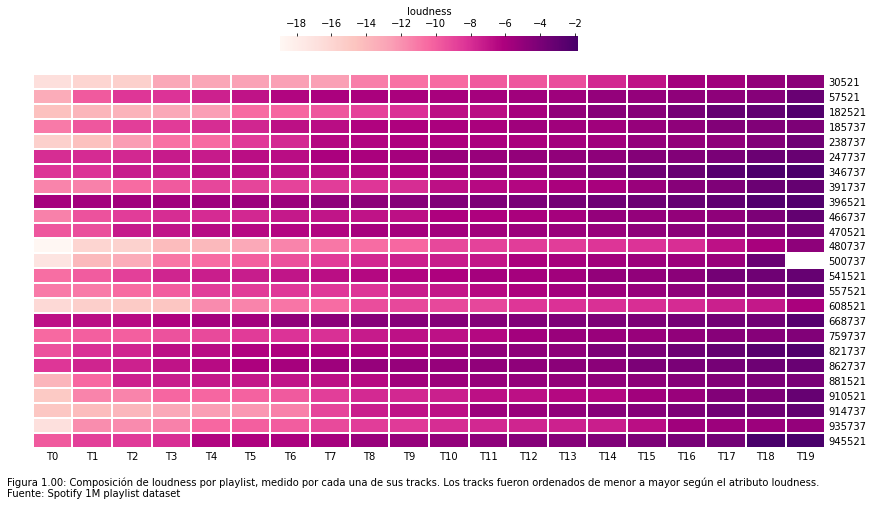

In [885]:
fig, ax = plt.subplots(figsize=(14.2, 8.6))

# shrink: parametro para compactar el tamaño del colorbar
sns.heatmap(heatmap,
            linewidths=.01,
            # Otros cmap: https://seaborn.pydata.org/tutorial/color_palettes.html
            cmap=sns.color_palette("RdPu", as_cmap=True),
#            cmap=sns.diverging_palette(220, 20, as_cmap=True),
#            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
            cbar_kws={
                      'label':'loudness',
                      'shrink': .375,
                      # importante cambiar los dos parametros en conjunto
                      'use_gridspec': False,
                      'location':'top'
                      })


# 'apagar' el eje vertical izquierdo y 'encender' el derecho
# argumento labelrotation=0 etiquetas de manera horizontal 
ax.tick_params(axis='both', 
                length=0,
                left=False,
                right=True,
                labelleft=False, 
                labelright=True,
                labelrotation=0,
                )

# eliminar títulos de los ejes x e y
ax.set_xlabel(None)
ax.set_ylabel(None)

# Agregar texto descriptivo en la parte inferior del gráa
fig.text(0.10, .046, 
         'Figura 1.00: Composición de loudness por playlist, medido por cada una de sus tracks. Los tracks fueron ordenados de menor a mayor según el atributo loudness.\nFuente: Spotify 1M playlist dataset',
         ha='left',
         size=10)

### Función para automatizar el gráfico

**TODO:** wrappear en una función el procedimiento anterior.

In [886]:
def heatmap_playlist_atributo(df: pd.DataFrame, atributo: str, num_tracks: int,
                              footer: bool = False) -> None:
  '''Describir brevemente esto...'''

  # 1. Preprocesar data
  heatmap = df.loc[df.num_tracks == num_tracks, ['pid', 'num_tracks', 'track_name', atributo]]
  heatmap.sort_values(['pid', atributo], inplace=True)
  heatmap['track_pos'] = heatmap.groupby('pid').cumcount()
  heatmap['track_pos'] = pd.Categorical(
    heatmap['track_pos'].apply(lambda x: 'T' + str(x)),
    categories = ['T' + str(x) for x in range(0, heatmap.num_tracks.max())],
    ordered = True
  )
  heatmap = heatmap[['pid', 'track_pos', atributo]].reindex().pivot('pid', 'track_pos', atributo)

  # 2. Crear visualización del heatmap
  #fig, ax = plt.subplots(figsize=(14.2, 8.6))

  # shrink: parametro para compactar el tamaño del colorbar
  sns.heatmap(heatmap,
              linewidths=.01,
              # Otros cmap: https://seaborn.pydata.org/tutorial/color_palettes.html
              cmap=sns.color_palette("RdPu", as_cmap=True),
              cbar_kws={
                        'label': atributo,
                        'shrink': .375,
                        # importante cambiar los dos parametros en conjunto
                        'use_gridspec': False,
                        'location':'top'
                        })


  # 'apagar' el eje vertical izquierdo y 'encender' el derecho
  # argumento labelrotation=0 etiquetas de manera horizontal 
  ax.tick_params(axis='both', 
                  length=0,
                  left=False,
                  right=True,
                  labelleft=False, 
                  labelright=True,
                  labelrotation=0,
                  )

  # eliminar títulos de los ejes x e y
  ax.set_xlabel(None)
  ax.set_ylabel(None)

  if footer:
    # Agregar texto descriptivo en la parte inferior del gráa
    fig.text(0.10, .046, 
            f'Figura 1.00: Composición de {atributo} por playlist, medido por cada una de sus tracks. Los tracks fueron ordenados de menor a mayor según el atributo {atributo}.\nFuente: Spotify 1M playlist dataset',
            ha='left',
            size=10)

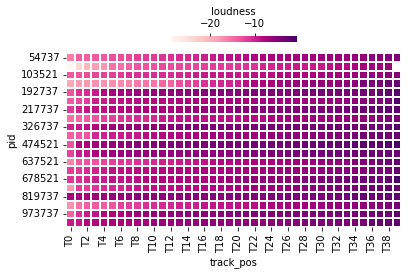

In [887]:
heatmap_playlist_atributo(df, 'loudness', 40, footer=True)

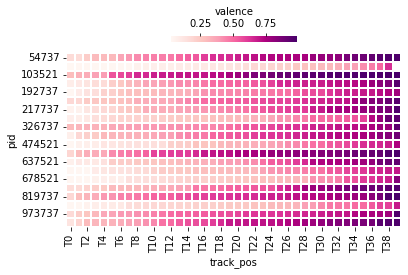

In [888]:
heatmap_playlist_atributo(df, 'valence', 40, footer=True)

In [889]:
df.columns

Index(['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'duration_ms_x',
       'num_artists', 'description', 'pos', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'album_name', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms_y', 'time_signature'],
      dtype='object')

Crear una grilla con todas las caracterizaciones por track features:

In [890]:
track_features = ['danceability', 'energy', 'tempo', 'loudness', 'mode', 'speechiness',\
                  'acousticness', 'instrumentalness', 'liveness', 'valence']

Antes de correr la siguiente línea, comentar la línea de código en
`heatmap_playlist_atributo` que establece el tamaño de la figura.

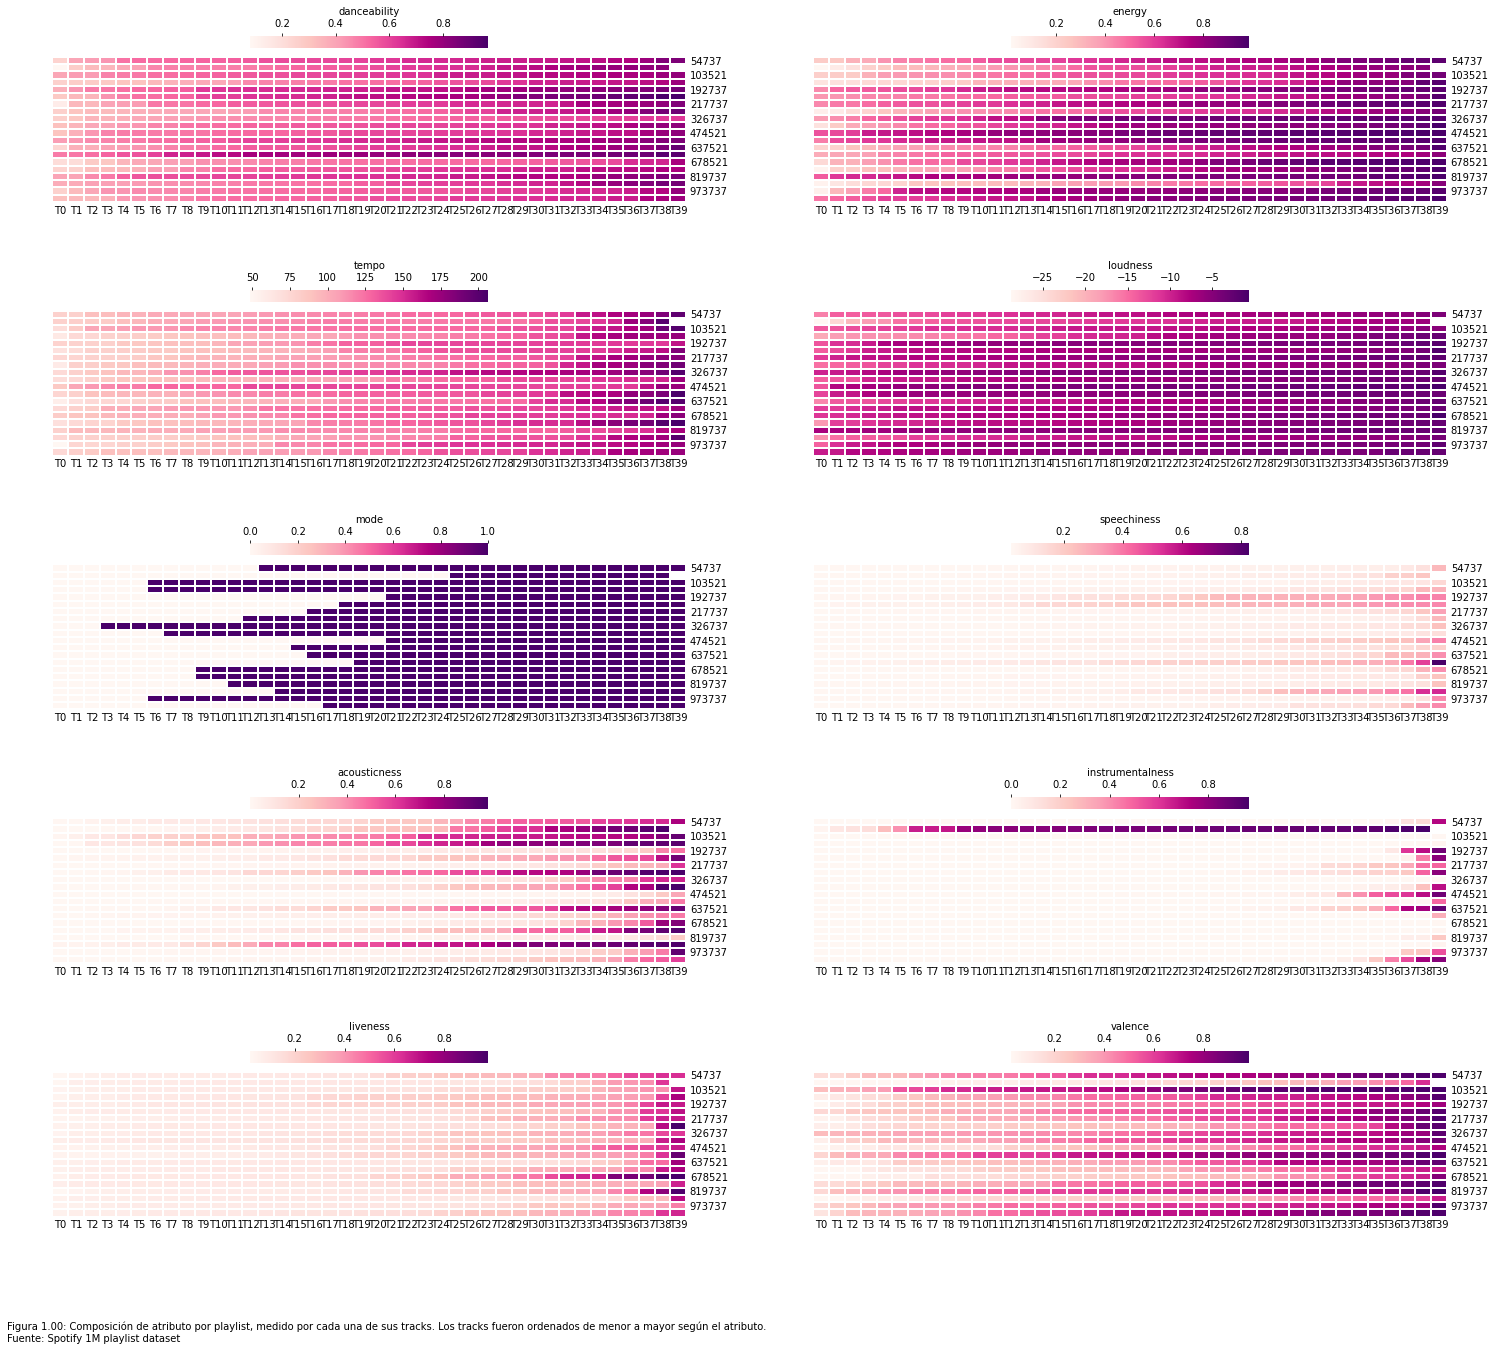

In [891]:
fig = plt.figure(figsize=(25, 22))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for i in range(1, 11):
    ax = fig.add_subplot(5, 2, i)
    heatmap_playlist_atributo(df, track_features[i-1], 40, footer=False)

#fig.suptitle('Caracterización de playlists por atributo de sus tracks')
fig.text(0.10, .046, 
         f'Figura 1.00: Composición de atributo por playlist, medido por cada una de sus tracks. Los tracks fueron ordenados de menor a mayor según el atributo.\nFuente: Spotify 1M playlist dataset',
         ha='left',
         size=10)
fig.savefig('heatmap_features.png', dpi=320, bbox_inches='tight')

## Distancias entre listas

Una forma directa de recomendar canciones respecto
a una _playlist_ es encontrar un conjunto de canciones candidatas basadas
en las Nth _playlist_ más cercanas.

**Objetivo:** crear una matriz de proximidad entre todas las listas en base
a los atributos de las canciones que las componen.

1. Se propone compactar los atributos de todas las canciones que pertenecen
a una _playlist_ en una vector de atributos agregados (e.g. media).
1. Computar las distancias según los vectores agregados entre todas las
_playlists_.
1. Seleccionar para cada _playlist_ los N _playlists_ más cercanas y
obtener sus id's.
1. Agregar una posible capa de filtros, i.e. canciones de esas listas
más cercanas que definitivamente no queremos recomendar.
1. Rankear las canciones restantes en base algún modelo o mécanismo para escoger
las primeras N canciones.


Nota: el sistema no requiere ningún entrenamiento, pero se debe
almacenar toda la data de entrenamiento para computa la matriz de
proximidad para una nueva lista.
Revisar algoritmos _approximate nearest neighbors_ los que seleccionnan
un subdominio antes de computar los vecinos más cercanos.

In [892]:
df.columns

Index(['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'num_edits', 'duration_ms_x',
       'num_artists', 'description', 'pos', 'artist_name', 'track_uri',
       'artist_uri', 'track_name', 'album_uri', 'album_name', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms_y', 'time_signature'],
      dtype='object')

Agrupar todas las características de las canciones por identificador
de las _playlists_ (i.e. `pid`):

* Utilizar el promedio
* Probar con otro tipo de metricas si cambian los set de listas más cercanas

In [893]:
features_by_pid = df[['pid','danceability', 'energy', 'key', 'loudness', 'mode',
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                      'valence', 'tempo']]

In [894]:
avg_features_by_pid = features_by_pid.groupby('pid').mean().reset_index()
avg_features_by_pid.head(n=5)

,pid,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,521,0.571929,0.603583,5.622047,-6.723984,0.645669,0.078784,0.265756,0.004983,0.165848,0.424082,121.238457
1,737,0.734743,0.700514,4.685714,-5.318743,0.514286,0.116509,0.231363,0.005657,0.168220,0.564543,121.309914
2,1521,0.571094,0.495594,5.593750,-9.276594,0.531250,0.053484,0.427185,0.181054,0.163422,0.375644,123.958344
3,1737,0.639841,0.560682,4.840909,-7.329977,0.568182,0.215809,0.283882,0.009141,0.194118,0.403686,119.328409
4,2521,0.725965,0.826105,5.771930,-4.143842,0.543860,0.079498,0.163493,0.001273,0.177870,0.725211,112.510000


In [895]:
y_pid = np.array(avg_features_by_pid.pid)

### Contruir Matriz de proximidad

Una vez que tengamos la matriz con los vectores promedios
de los atributos de canciones según _playlist_, es posible crear una matriz de proximidad fácilmente con `scipy.spatial.distancia_matrix`.

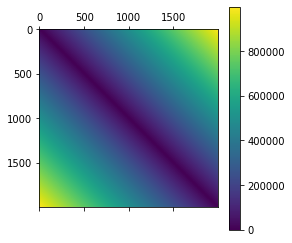

In [896]:
# Calcular matriz de distancia entre features promedio de cada playlist
from scipy.spatial import distance_matrix
playlists_similarity = distance_matrix(avg_features_by_pid, avg_features_by_pid)
plt.matshow(playlists_similarity)
plt.colorbar()

Dado el indice que representa una lista, obtenemos información acerca
de sus N listas más cercanas:

In [897]:
L_idx=3
N=5

closest_N_index = np.argsort(playlists_similarity[L_idx, :])[1:N+1]
closest_pid = y_pid[closest_N_index]
print(closest_pid)
avg_features_by_pid.iloc[closest_N_index, :]

[1521 2521  737 2737  521]


,pid,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
2,1521,0.571094,0.495594,5.593750,-9.276594,0.531250,0.053484,0.427185,0.181054,0.163422,0.375644,123.958344
4,2521,0.725965,0.826105,5.771930,-4.143842,0.543860,0.079498,0.163493,0.001273,0.177870,0.725211,112.510000
1,737,0.734743,0.700514,4.685714,-5.318743,0.514286,0.116509,0.231363,0.005657,0.168220,0.564543,121.309914
5,2737,0.584560,0.405120,4.720000,-8.506720,0.880000,0.038796,0.503012,0.000498,0.157072,0.388872,114.178680
0,521,0.571929,0.603583,5.622047,-6.723984,0.645669,0.078784,0.265756,0.004983,0.165848,0.424082,121.238457


In [898]:
avg_features_by_pid.iloc[L_idx, :]

pid                 1737.000000
danceability           0.639841
energy                 0.560682
key                    4.840909
loudness              -7.329977
mode                   0.568182
speechiness            0.215809
acousticness           0.283882
instrumentalness       0.009141
liveness               0.194118
valence                0.403686
tempo                119.328409
Name: 3, dtype: float64

A modo de verificar que una lista no domine la proximidad entre todas,
se analiza el número de veces que cada lista aparece en las 5 listas
más cercanas de otra.

In [899]:
counter = np.zeros(playlists_similarity.shape[0])
N=5
for i in range(playlists_similarity.shape[0]):
  closest_N_index = np.argsort(playlists_similarity[i, :])[:N+1][1:]
  counter[closest_N_index] += 1

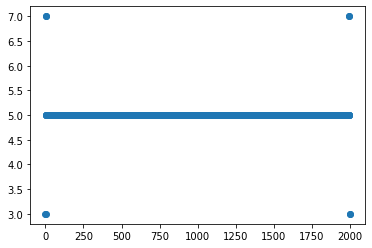

In [900]:
plt.scatter(np.arange(playlists_similarity.shape[0]), counter)

Ningúna lista esta más de 7 veces en el top 5 de listas cercanas del resto.

Explorar el número de canciones para una lista en particular respecto
al conjunto de canciones en las N-listas más cercanas.


In [901]:
L_idx=830
N=5
closest_N_index = np.argsort(playlists_similarity[L_idx, :])[:N+1][1:]
closest_pid = y_pid[closest_N_index]

# Obtener información de las canciones de las N listas más cercanas
KNP_df = df.loc[np.isin(df.pid, closest_pid), :]
possible_tracks = set(KNP_df.loc[:, 'track_name'])
possible_artists = set(KNP_df.loc[:, 'artist_name'])
current_tracks = set(df.loc[df.pid == y_pid[L_idx], 'track_name'])
current_artists = set(df.loc[df.pid == y_pid[L_idx], 'artist_name'])

print('Información sobre canciones\n-----------------------------')
print('Número de canciones contenidas en ambos set (playlists): ', len(current_tracks.intersection(possible_tracks)))
print('Nombre canciones en ambos set: ', current_tracks.intersection(possible_tracks))
print('Número de canciones distintas entre ambos set (playlists): ', len(current_tracks.difference(possible_tracks)), '\n')
print('Información sobre artista\n-------------------------------')
print('Número de artistas contenidos en ambos set (playlists): ', len(current_artists.intersection(possible_artists)))
print('Nombre artistas en ambos set: ', current_artists.intersection(possible_artists))
print('Número de artistas distintas entre ambos set (playlists): ', len(current_artists.difference(possible_artists)))

Información sobre canciones
-----------------------------
Número de canciones contenidas en ambos set (playlists):  0
Nombre canciones en ambos set:  set()
Número de canciones distintas entre ambos set (playlists):  12 

Información sobre artista
-------------------------------
Número de artistas contenidos en ambos set (playlists):  0
Nombre artistas en ambos set:  set()
Número de artistas distintas entre ambos set (playlists):  3


Crear un histograma con el número de canciones que tiene en común con el set
de candidatos a proponer.

In [902]:
num_common_tracks = np.zeros(playlists_similarity.shape[0])
num_common_artists = np.zeros(playlists_similarity.shape[0])

N=5

for i in range(playlists_similarity.shape[0]):
  closest_N_index = np.argsort(playlists_similarity[i, :])[:N+1][1:]
  closest_pid = y_pid[closest_N_index]

  KNP_df = df.loc[np.isin(df.pid, closest_pid), :]
  possible_tracks = set(KNP_df.loc[:, 'track_name'])
  current_tracks = set(df.loc[df.pid == y_pid[i], 'track_name'])
  possible_artists = set(KNP_df.loc[:, 'artist_name'])
  current_artists = set(df.loc[df.pid == y_pid[i], 'artist_name'])

  num_common_tracks[i] = len(current_tracks.intersection(possible_tracks))
  num_common_artists[i] = len(current_artists.intersection(possible_artists))

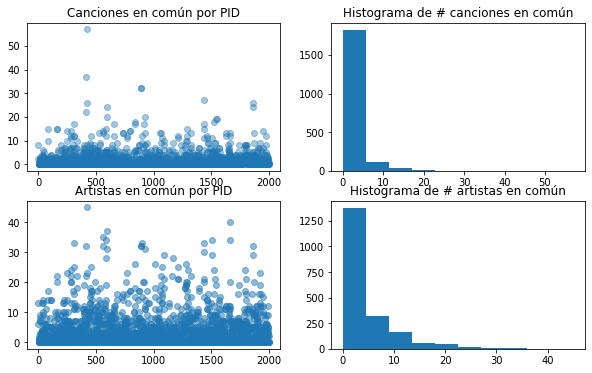

In [903]:
plt.figure(figsize=(10, 6));
plt.subplot(2,2,1);
plt.plot(num_common_tracks, 'o', alpha=.4)
plt.title('Canciones en común por PID');

plt.subplot(2,2,2);
plt.hist(num_common_tracks);
plt.title('Histograma de # canciones en común');

plt.subplot(2,2,3);
plt.plot(num_common_artists, 'o', alpha=.5);
plt.title('Artistas en común por PID');

plt.subplot(2,2,4);
plt.hist(num_common_artists);
plt.title('Histograma de # artistas en común');

### Se crea un Dataframe con las features de los audios + artist_uri

In [904]:
features_by_pid_and_artist = df[['pid', 'artist_uri', 'uri', 'danceability', 'energy', 'key', 'loudness', 'mode',
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                      'valence', 'tempo']]
features_by_pid_and_artist.drop_duplicates(subset=['artist_uri'])
features_by_pid_plus_artist = features_by_pid_and_artist.merge(artist_info[['artists.uri', 'artists.popularity']], left_on='artist_uri', right_on='artists.uri', how='left')
features_by_pid_plus_artist = features_by_pid_plus_artist.drop(['artists.uri'], axis=1)
features_by_pid_plus_artist

,pid,artist_uri,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artists.popularity
0,521,spotify:artist:25uiPmTg16RbhZWAqwLBy5,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,0.653,0.794,7,-3.828,1,0.0894,0.1210,0.000000,0.3650,0.645,93.008,83.0
1,535521,spotify:artist:25uiPmTg16RbhZWAqwLBy5,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,0.653,0.794,7,-3.828,1,0.0894,0.1210,0.000000,0.3650,0.645,93.008,83.0
2,820737,spotify:artist:25uiPmTg16RbhZWAqwLBy5,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,0.653,0.794,7,-3.828,1,0.0894,0.1210,0.000000,0.3650,0.645,93.008,83.0
3,874521,spotify:artist:25uiPmTg16RbhZWAqwLBy5,spotify:track:0y8Wf6ltWpGCpgqVa21QNX,0.653,0.794,7,-3.828,1,0.0894,0.1210,0.000000,0.3650,0.645,93.008,83.0
4,521,spotify:artist:69GGBxA162lTqCwzJG5jLp,spotify:track:6RUKPb4LETWmmr3iAEQktW,0.617,0.635,11,-6.769,0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132758,999521,spotify:artist:610tJqABwgZWaRvtJoJQF0,spotify:track:0zjW4c0nPCrsaQA3q9yjml,0.739,0.604,8,-2.573,1,0.0751,0.6660,0.000000,0.3360,0.971,112.433,57.0
132759,999521,spotify:artist:63zgw9LU9aqnuHnvHr3ZUZ,spotify:track:6tNrSTWNn4oUkoupn1ITJd,0.757,0.421,5,-6.768,1,0.0396,0.7470,0.000000,0.0802,0.858,104.968,50.0
132760,999521,spotify:artist:1gW6pz5n1aK249L0GvfQCC,spotify:track:7KXL3yfanDowu6shK3Vl0d,0.730,0.565,4,-4.501,1,0.0285,0.2870,0.000000,0.3520,0.914,99.960,74.0
132761,999521,spotify:artist:4J13m9IZh03PEhoxAxRhXO,spotify:track:6c5ghmeB5B3eUwO9Gr4Dgx,0.661,0.423,7,-7.107,1,0.0260,0.5830,0.000000,0.2210,0.767,139.859,78.0


In [905]:
features_by_pid_plus_artist[features_by_pid_plus_artist['pid'] == 521].groupby('pid').mean().iloc[:,:-1].to_numpy()

array([[ 5.71929134e-01,  6.03582677e-01,  5.62204724e+00,
        -6.72398425e+00,  6.45669291e-01,  7.87842520e-02,
         2.65756169e-01,  4.98320630e-03,  1.65848031e-01,
         4.24081890e-01,  1.21238457e+02]])

In [906]:
recSys.proximity_matrix.shape

(2001, 2001)

### Clase `RecommendNearest`

In [907]:
class RecommendNearest:
    
  def __init__(self):
    self.proximity_matrix=None
    self.obs_labels=None
    self.N_nearest=None
    self.artist=None
    self.pid_id=None
    self.avg_features_by_pid=None

  def fit(self, X, y, artist):
    '''Almacena la matriz de proximidad y guarda los PID en self.obs_labels'''
    self.avg_features_by_pid = X
    self.obs_labels = y
    self.proximity_matrix = distance_matrix(X, X)
    self.artist = artist
    
  def refit(self):
    '''Actualiza la matriz de distancia en base a self.avg_features_by_pid'''
    self.proximity_matrix = distance_matrix(self.avg_features_by_pid, self.avg_features_by_pid)
    
  def get_N_nearest(self, pid_id, N=5):
    '''Retorna una lista de los N pid_id más cercanos al pid_id entregado'''
    try:
        pid_position = int(np.where(self.obs_labels == pid_id)[0])
        self.pid_id = pid_id
    except TypeError:
        print('PID no se encuentra en datos de entrenamiento')
    nearest_index = np.argsort(self.proximity_matrix[pid_position, :])[:N+1][1:]
    # Se actualizar estado de esta variable para recomendar canciones en
    # base a las playlist mas cercanas
    self.N_nearest = self.obs_labels[nearest_index]
    return self.obs_labels[nearest_index]

  def retrieveAll_N_nearest(self, N=5):
    '''Retorna un np.array con N playlist con posibles candidatos a recomendar.
       La primera columna contiene el PID con respecto al cual se buscaron
       las siguientes N-PID columnas de playlist más cercanas.
    '''
    output = np.c_[self.obs_labels, np.zeros((self.obs_labels.shape[0], N), dtype='int32')]
    for idx, pid in enumerate(self.obs_labels):
        output[idx, 1:] = self.get_N_nearest(pid, N=N)
    return output

  def recommend_given_track_set(self, track_features_set, N=10):
    '''
       Recibe un set de canciones sin PID con sus track_features (track_feature_set).
       Se recomputa self.proximity_matrix agregando el nuevo set de canciones
       como PID "pivote"
       Se deja reservado el PID 0 para este set de canciones
    '''
    track_set = pd.concat([pd.DataFrame({'PID': np.zeros(track_features_set.shape[0], 'int32')}),
                           track_features_set], axis=1)
    
    track_set = track_set.groupby('PID').mean().reset_index()
   
    # Concatenar al principio del atributo self.avg_features_by_pid y self.obs_labels
    #self.avg_features_by_pid = pd.concat([track_set.iloc[:, 1:], self.avg_features_by_pid], axis=0)
    self.avg_features_by_pid = np.r_[track_set.iloc[:, 1:], self.avg_features_by_pid]
    self.obs_labels = np.r_[0, self.obs_labels]
    
    # Actualizar matriz de distancia
    self.refit()
    
    # Actualizar listas mas cercanas (siempre es el PID en la posición 0)
    nearest_index = np.argsort(self.proximity_matrix[0, :])[:N+1][1:]
    self.N_nearest = self.obs_labels[nearest_index]
    self.pid_id = 0
    
    # Entregar recomendaciones
    return self.get_recommendations()
    
  def get_recommendations(self, num_tracks=20):
    '''Dado un track de canciones arbitarias, se utiliza por el método
       recommend_given_track_set
    '''
    recommended_songs_list = self.artist[self.artist.pid.isin(self.N_nearest)].copy()
    recommended_songs_list = recommended_songs_list.drop_duplicates(subset=['artist_uri'])
    
    # Seleccionar solo los features de las canciones
    features_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 
     'speechiness', 'acousticness', 'instrumentalness', 
     'liveness', 'valence', 'tempo']

    recommended_songs_list['similarity'] = np.dot(recommended_songs_list[features_columns].to_numpy(), 
                                                  self.avg_features_by_pid[0, :].reshape(11, 1))
    
    recommended_songs_list = recommended_songs_list.sort_values(by=['similarity'], ascending=True)
    
    # Seleccionar de 0 hasta num_tracks
    return recommended_songs_list.iloc[:num_tracks]
    
  def get_gt_N_candidates(self, min_tracks=50):
    '''
       Retorna tantos pid_id sean necesarios para tener al menos 50 candidatos
       de canciones a sugerir.
    '''
    # Se obtienen un dataframe que contiene todas las canciones de las listas recomendadas.
    recommended_songs_list = self.artist[self.artist.pid.isin(self.N_nearest)].copy()
    
    # Se calcula el promedio de las features de la playlist ingresada en "recSys.obs_labels[X]"
    
    features_mean = self.artist[self.artist['pid'] == self.pid_id].\
                                                                            groupby('pid').\
                                                                            mean().\
                                                                            iloc[:,:-1]
    
    # Se calcula la similitud coseno y se multiplica por la popularidad del artista.
    recommended_songs_list['similarity'] = recommended_songs_list.apply(
                                                lambda x: cosine_similarity(x.iloc[3:-1].\
                                                                              to_numpy().reshape(1, -1), 
                                                features_mean.to_numpy().reshape(1, -1))[0][0], 
                                                axis=1) * (0.01+recommended_songs_list['artists.popularity']/100)
    
    # Se eliminan los duplicados.
    recommended_songs_list = recommended_songs_list.drop_duplicates(subset=['artist_uri'])
    
    #print(recommended_songs_list)
    # Se ordena la lista...
    recommended_songs_list = recommended_songs_list.sort_values(by=['similarity'], ascending=False)
    
    return recommended_songs_list.iloc[:min_tracks].to_numpy()

  def plot_proximity_matrix(self):
        
    if isinstance(self.proximity_matrix, np.ndarray):
        plt.matshow(self.proximity_matrix);
        plt.colorbar();

In [908]:
avg_features_by_pid.shape

(2000, 12)

In [909]:
recSys = RecommendNearest()
recSys.fit(avg_features_by_pid.iloc[:, 1:].to_numpy(), 
           avg_features_by_pid.iloc[:, 0].to_numpy(), 
           features_by_pid_plus_artist)

In [910]:
recSys.avg_features_by_pid.shape

(2000, 11)

Utilizar el método PID para obtener los PID de
las N-_playlists_ más cercanas:

In [911]:
PID = recSys.obs_labels[1]
print(PID)

737


In [912]:
# Por ejemplo, obtener las 10 listas más cercanas del PID=550737
recSys.get_N_nearest(PID, N=10)

array([ 85521,  78737, 279521, 691737, 311737, 532737, 869737, 267521,
        98521, 668737])

In [913]:
recSys.avg_features_by_pid.shape

(2000, 11)

In [914]:
# Obtener el id de algunas canciones dentro de la lista
df.loc[df.pid == 550737, 'track_uri'][:6]

8350     spotify:track:0rM7aAHE16zBRXvuOrvGdh
16940    spotify:track:43LnmNOAtqFhG0pSrnMgct
36900    spotify:track:1yJZwBqTyGTB7mz8nZyiel
38219    spotify:track:6yIHGmQLJxWAUZ1ZkENemN
39037    spotify:track:25J4d78ESH2MgAJoIakB8O
39170    spotify:track:2zH8blq2DmO9c8305A2iFB
Name: track_uri, dtype: object

El método `RecommendNearest.get_gt_N_candidates` entrega un número de canciones
basadas en las listas más cercanas de arriba y rankeadas según popularidad:

In [915]:
recSys.get_gt_N_candidates(min_tracks=20)

array([[78737, 'spotify:artist:06HL4z0CvFAxyc27GXpf02',
        'spotify:track:6uFsE1JgZ20EXyU0JQZbUR', 0.773, 0.68, 9, -6.378,
        0, 0.141, 0.213, 1.57e-05, 0.122, 0.497, 128.062, 98.0,
        0.9894818561634169],
       [267521, 'spotify:artist:3TVXtAsR1Inumwj472S9r4',
        'spotify:track:3fyMH1t6UPeR5croea9PrR', 0.427, 0.861, 1, -4.874,
        1, 0.376, 0.219, 0.0, 0.277, 0.581, 161.776, 98.0,
        0.9893785629656784],
       [85521, 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ',
        'spotify:track:25khomWgBVamSdKw7hzm3l', 0.356, 0.567, 0, -7.011,
        0, 0.0798, 0.0861, 0.0, 0.137, 0.109, 135.553, 97.0,
        0.9792170484041592],
       [85521, 'spotify:artist:6eUKZXaKkcviH0Ku9w2n3V',
        'spotify:track:6u0oHknFYrnUd42A6rvFly', 0.818, 0.67, 8, -4.451,
        0, 0.0472, 0.304, 1.22e-06, 0.0601, 0.939, 119.988, 96.0,
        0.9695844489226593],
       [691737, 'spotify:artist:1uNFoZAHBGtllmzznpCI3s',
        'spotify:track:7ET8LMtOv8XyBPKzr2Pgrr', 0.737, 0.813, 

In [916]:
recSys.avg_features_by_pid.shape

(2000, 11)

Los `pid` deben estar en los datos que se pasaron por
el método `RecommendNearest.fit()`, sino tira un error:

Se pueden obtener las N-_playlists_ más cercanas de
todo el conjunto de entrenamiento, donde la primera
columna es el PID respecto al cual se están recomendando
las siguientes N _playlists_:

In [917]:
rec_df = recSys.retrieveAll_N_nearest(N=3)
rec_df

array([[   521,  49521, 107737, 497521],
       [   737,  85521,  78737, 279521],
       [  1521, 956737, 609737, 183737],
       ...,
       [998737, 105737,  79521, 901521],
       [999521, 531521, 604737, 586521],
       [999737, 808521, 135521, 260521]])

In [918]:
recSys.avg_features_by_pid.shape

(2000, 11)

Es posible ver los conjunto de intersección y diferencia entre una lista y sus N listas más cercanas

```python
set(df.loc[df.pid==521, 'track_name']).intersection(set(df.loc[df.pid==497521, 'track_name']))
set(df.loc[df.pid==521, 'track_name']).difference(set(df.loc[df.pid==497521, 'track_name']))
```

Dado un set de canciones con sus track features recomendar canciones en base
a las PID más cercanas que encuentre:

In [970]:
test_set = pd.read_csv('./10_canciones_features_azar.csv')

In [971]:
test_set.columns

Index(['playlist_name', 'collaborative', 'pid', 'num_tracks', 'num_albums',
       'num_artists', 'pos', 'track_uri', 'artist_uri', 'track_name',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [972]:
features_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 
 'speechiness', 'acousticness', 'instrumentalness', 
 'liveness', 'valence', 'tempo']

In [973]:
test_set = test_set[features_columns]

In [974]:
test_set

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.511,0.846,2.0,-6.967,1.0,0.0607,0.29800,0.000742,0.3850,0.619,174.946
1,0.752,0.853,8.0,-5.222,1.0,0.0491,0.13300,0.000000,0.0238,0.859,104.003
2,0.592,0.985,10.0,-2.859,1.0,0.0546,0.00522,0.038900,0.4000,0.459,129.936
3,0.656,0.291,2.0,-10.572,1.0,0.0293,0.87200,0.000000,0.1140,0.298,103.971
4,0.592,0.416,1.0,-9.794,1.0,0.0246,0.88200,0.000586,0.1120,0.417,96.002
5,0.445,0.598,2.0,-11.264,0.0,0.0363,0.01120,0.000000,0.0570,0.778,124.250
6,0.480,0.928,4.0,-5.501,1.0,0.0899,0.16900,0.000000,0.0479,0.713,167.986
7,0.532,0.767,7.0,-5.509,1.0,0.0574,0.00287,0.000513,0.3900,0.755,127.361
8,0.671,0.848,5.0,-4.745,1.0,0.2100,0.24500,0.000000,0.4040,0.536,160.182
9,0.716,0.879,5.0,-4.462,0.0,0.1820,0.03450,0.000000,0.1210,0.713,93.966


In [975]:
recSys = RecommendNearest()
recSys.fit(avg_features_by_pid.iloc[:, 1:].to_numpy(), 
           avg_features_by_pid.iloc[:, 0].to_numpy(), 
           features_by_pid_plus_artist)
recommended_songs = recSys.recommend_given_track_set(test_set)

In [993]:
recommended_songs.uri.iloc[:10]

50513     spotify:track:1C0vXECyJHUeqOo2Etvrr2
45655     spotify:track:2IpGdrWvIZipmaxo1YRxw5
97933     spotify:track:2fNkxgImVNczSgpF7OVdIS
76765     spotify:track:0aWia6YqI2s9r41bXwnqhX
58552     spotify:track:08GujSR7BcjakZUzX0R0nl
19096     spotify:track:1tpLxOKuAaRCViAxf2pgNr
90641     spotify:track:4WnY4W5KrqglCdIus8X9Bo
114759    spotify:track:5UY3Vzkc5INzJ3wBJm5FlD
9537      spotify:track:2EEeOnHehOozLq4aS0n6SL
47954     spotify:track:07pJdL0L9XDGW0HBj0rIS2
Name: uri, dtype: object

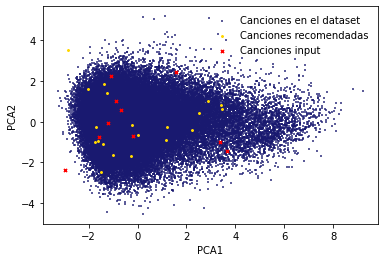

In [984]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_by_pid_plus_artist
pca = PCA(n_components=2)
scaler = StandardScaler()

X_features_2d = pca.fit_transform(scaler.fit_transform(features_by_pid_plus_artist.drop_duplicates(subset='uri')[features_columns]))
plt.scatter(X_features_2d[:, 0], X_features_2d[:, 1], c='midnightblue', s=2, marker='+', alpha=.7,
           label='Canciones en el dataset')

pca_recommended = pca.fit_transform(scaler.fit_transform(recommended_songs[features_columns]))

# Pintar canciones a recomendar
plt.scatter(pca_recommended[:, 0], pca_recommended[:, 1], c='gold', marker='x', s=4, label='Canciones recomendadas')

test_set_pca = pca.fit_transform(scaler.fit_transform(test_set))
# ... 
plt.scatter(test_set_pca[:, 0], test_set_pca[:, 1], c='red', marker='x', s=10, label='Canciones input')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(frameon=False)
#plt.savefig('RecommendNearest20Songs.png', dpi=420)

In [1009]:
top10recomendaciones = playlists.loc[np.isin(playlists.track_uri, recommended_songs.uri.iloc[:10]), ['artist_name', 'track_name', 'track_uri']].drop_duplicates()

In [1013]:
top10recomendaciones

,artist_name,track_name,track_uri
1566,KYLE,iSpy (feat. Lil Yachty),spotify:track:2EEeOnHehOozLq4aS0n6SL
2896,Brad Paisley,Whiskey Lullaby,spotify:track:1tpLxOKuAaRCViAxf2pgNr
8434,Trey Songz,Bottoms Up - feat. Nicki Minaj,spotify:track:2IpGdrWvIZipmaxo1YRxw5
9234,MadeinTYO,Skateboard P (feat. Big Sean),spotify:track:07pJdL0L9XDGW0HBj0rIS2
10102,Evanescence,My Immortal,spotify:track:1C0vXECyJHUeqOo2Etvrr2
13209,Fifth Harmony,Miss Movin' On,spotify:track:08GujSR7BcjakZUzX0R0nl
26537,Kstylis,Booty Me Down,spotify:track:0aWia6YqI2s9r41bXwnqhX
41536,Brantley Gilbert,You Don't Know Her Like I Do,spotify:track:4WnY4W5KrqglCdIus8X9Bo
52516,Lil Bibby,You Ain't Gang,spotify:track:2fNkxgImVNczSgpF7OVdIS
83769,Craig Morgan,Wake up Lovin' You,spotify:track:5UY3Vzkc5INzJ3wBJm5FlD


### Features por lista > cluster > PCA

In [61]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Ajustar DBSCAN:

In [62]:
dbs_before_pca = DBSCAN(eps=0.6, min_samples=7, n_jobs=8)
dbs_before_pca.fit(X_features)

NameError: name 'X_features' is not defined

Agregar método de la rodila...

Visualizar los cluster en 2 dimensiones, luego de reducir con PCA, agregar
etiquetas de los cluster encontrados anteriormente.

In [63]:
scaler = StandardScaler()
pca = PCA(n_components=2)
X_features_2d = pca.fit_transform(scaler.fit_transform(X_features))

NameError: name 'X_features' is not defined

In [ ]:
plt.scatter(X_features_2d[:, 0], X_features_2d[:, 1], c=dbs_before_pca.labels_)

### Features por lista > PCA > cluster

In [ ]:
X_features_2d = pca.fit_transform(scaler.fit_transform(X_features))
dbs_after_pca = DBSCAN(eps=0.6, min_samples=7, n_jobs=8)
dbs_after_pca .fit(X_features_2d);
plt.scatter(X_features_2d[:, 0], X_features_2d[:, 1], c=dbs_after_pca.labels_);